### **Statistical analyses for the book chapter: “Evolutionary implications of violence in complex societies in the central Andes region, a bioarchaeological analysis”**

**Authors:** Felipe Pinto dos Santos and Danilo Vicensotto Bernardo
**Year:** 2025 
**Software:** Python

## 1. Data Loading and Preparation

### 1.1 Importing Libraries and Initial Loading

The first step is importing the necessary libraries and loading the dataset. The following code demonstrates the import of essential libraries such as `numpy` for numerical operations, `pandas` for data manipulation, `statsmodels` for statistical modeling, and `matplotlib.pyplot` for visualization.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 

# === 1) load data ===
file_path = "tr_data_andescentral.xlsx"  
df = pd.read_excel(file_path)
df.head() # show the structure of the data (coluns and rows)

,autor_year,country,region,grupy_region,site,lat,long,elevation_m,culture,period,...,n_antimortem_posterior,n_perimortem_posterior,n_tr_lateral,n_antimortem_lateral,n_tr_perimortem_lateral,lateral_e,lateral_d,n_tr_superior,n_antimortem_superior,n_perimortem_superior
0,Tung 2007 e Tung 2012,Peru,Ayacucho,Terras Altas,Conchopata,"-13,1572","-74,1939",2839.0,Pré_Wari_Huarpa,EIP,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tung 2007 e Tung 2012,Peru,Ayacucho,Terras Altas,Conchopata,"-13,1572","-74,1939",2839.0,Pré_Wari_Huarpa,EIP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tung 2007 e Tung 2012,Peru,Ayacucho,Terras Altas,Conchopata,"-13,1572","-74,1939",2839.0,Pré_Wari_Huarpa,EIP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tung 2014,Peru,Ayacucho,Terras Altas,Huari_Cheqo_wasi,"-13,0647","-74,1747",2839.0,Wari,MH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tung 2014,Peru,Ayacucho,Terras Altas,Huari_Cheqo_wasi,"-13,0647","-74,1747",2839.0,Wari,MH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Variable Selection

In the followling cell, the variables of interesting was select, that is  `n_id` and `n_id_affect`. This two columns are extracted into separate variables. This step is crucial for focusing on relevant data and simplifying future operations.

In [2]:
# select variables for analyses

n_id = df['n_id']
n_id_affect = df['n_id_affect']



### 1.3 Descriptive Statistics

To understand the distribution and basic characteristics of the variables, descriptive statistics are calculated. The `describe()` method of pandas provides a statistical summary, including count, mean, standard deviation, minimum and maximum values, and quartiles.

In [3]:
subset = df[['n_id','n_id_affect']] # select coluns 
print(subset.describe())

            n_id  n_id_affect
count  95.000000    95.000000
mean   20.431579     6.000000
std    18.876222     9.187179
min     1.000000     0.000000
25%     6.000000     1.000000
50%    14.000000     3.000000
75%    29.000000     6.000000
max    77.000000    52.000000


These values provide an overview of the centrality, dispersion, and shape of the distributions of the `n_id` and `n_id_affect` variables.


### 1.4 Visualization: Histograms

Histograms are powerful visual tools for understanding the distribution of a single variable. The following code generates histograms for `n_id` and `n_id_affect`, allowing observation of the the total number of individual observed and the count events of truma. 

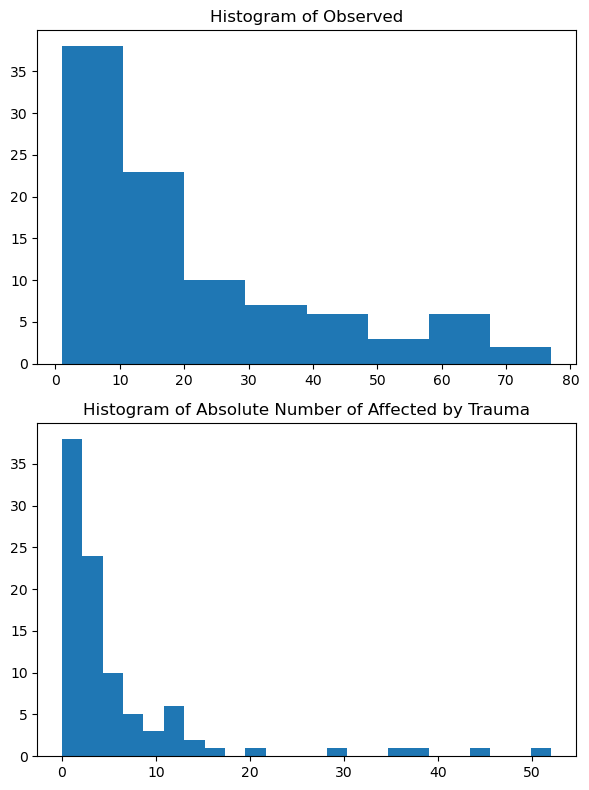

In [4]:

# Ploting histogram of variables: 

# Figure and subplots configuration
fig, axs = plt.subplots(2, 1, figsize=(6, 8))

# Plotting the first histogram
axs[0].hist(n_id, bins='auto')
axs[0].set_title('Histogram of Observed')

# Plotting the second histogram
axs[1].hist(n_id_affect, bins='auto')
axs[1].set_title('Histogram of Absolute Number of Affected by Trauma')

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the figure
plt.show()

Observing the plots, it is notable that the values of the two variables it is concentrate in the lowwer values, with higher values dispersed. Visualy this type of distribuition is very similar to a poisson and binomial negative distribuition. 

### 1.5 Relative Frequency per Period

To analyze the relationship between the trauma occurence and the periods, the relative frequency per period was calculated. This procedure involves grouping the data by `period` and calculating the proportion of `n_id_affect` relative to `n_id`:

In [5]:
# Calculating the relative frequency per period
fr = df[['period', 'n_id', 'n_id_affect']]
fr = fr.fillna(0)

# Grouping and calculating sums
sum = fr.groupby('period').sum()
fr_result = sum['n_id_affect'] / sum['n_id']

# Displaying the result
print(fr_result)

period
EIP    0.165829
LIP    0.375685
MH     0.234017
dtype: float64


These values indicate the relative frequency of individuals affected by trauma in LIP period was more higher than previous one as expected by the assunptions of this study. In the following code cell, a bar chart was generate for visualising the diference in relative frequence by period.

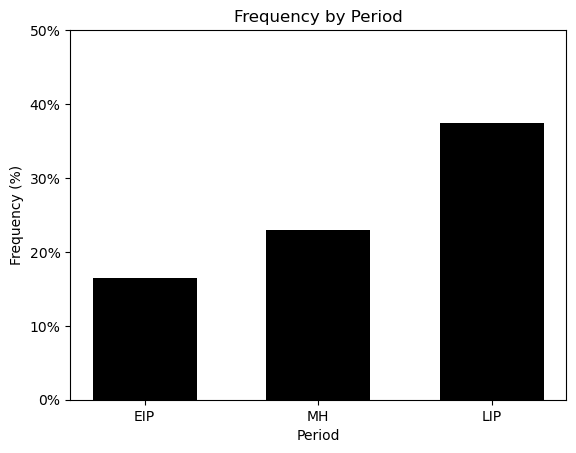

In [6]:
# Ploting relative frequence per period: 

import matplotlib.pyplot as plt

# Example data (replace with your actual data)
period = ['EIP', 'MH', 'LIP']
fr_result = [0.165, 0.23, 0.375]

fig, ax = plt.subplots()

# Plot bars in black with adjusted width of 0.6
ax.bar(period, fr_result, color='black', width=0.6)

# Increase the maximum y-axis value to 0.50
ax.set_ylim(0, 0.50)

# Label and title configuration
ax.set_xlabel('Period')
ax.set_ylabel('Frequency (%)')
plt.title('Frequency by Period')

# Convert decimal values to percentages on the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0%}".format(x)))

# Display the bar chart
plt.show()

The bar chart show that the relative frequence of trauma was tendencialy higher in more recent periods

## 2. Statistical Modeling: GLM with Negative Binomial Distribution


### 2.1 Data Preparation for Modeling

Before fitting a statistical model, the data was prepared. The relevant variables was selected, missing values was handeling , and variables was transforming, such as creating an `offset` for count models.

In [7]:
# Select the variables of interest 
data = df[['period', 'n_id', 'n_id_affect']].copy()
data['n_id'] = pd.to_numeric(data['n_id'], errors='coerce')
data['n_id_affect'] = pd.to_numeric(data['n_id_affect'], errors='coerce')

# drop NA data
data = data.dropna(subset=['period','n_id','n_id_affect']).copy()

# avoid log(0)
data = data[data['n_id'] > 0].copy()
data['offset'] = np.log(data['n_id']) # define n_id as offset

# Define the MH period as baseline for analyses 
data['period'] = pd.Categorical(data['period'], categories=['MH','EIP','LIP'], ordered=True)


These steps above ensure that the data is in the correct format and that problematic values (like `log(0)`) are handled, in addition to defining a reference category for the `period` variable.

### 2.2 Mean and Variance Analysis

For count models, it is important to check the relationship between the mean and variance of the data. In Poisson distributions, the mean equals the variance. Significant deviations indicate the need for more flexible models, such as the Negative Binomial.


In [11]:
###########################################

y = data["n_id_affect"]

media = np.mean(y)
variancia = np.var(y, ddof=1)

print("Média:", media)
print("Variância:", variancia)
print("Razão Var/Média:", variancia/media)


Média: 6.0
Variância: 84.40425531914893
Razão Var/Média: 14.067375886524822


The results above indicate that the variance/Mean ratio is significantly greater than 1 indicates overdispersion, justifying the use of a Negative Binomial model.

In [12]:

# fórmula do modelo (mantendo a comparação por período)
formula = "n_id_affect ~ C(period)"

# === 2) estimar mu via Poisson (mesma fórmula e offset) ===
pois = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.Poisson(),
    offset=data['offset']
).fit()

mu = pois.fittedvalues.values
y  = data['n_id_affect'].astype(float).values
print(mu,y)

[ 0.16582915  0.66331658  0.99497487  2.34016888  2.57418577  0.70205066
  3.27623643  5.8504222   1.17008444  3.74427021  2.34016888  3.04221954
  9.12665862  9.12665862  6.08443908  6.76232202  4.13253012  2.57418577
  1.17008444  5.63526835  3.75684556  7.13800657  6.38663746  0.37568456
 23.66812705 27.04928806 10.14348302  6.0109529   1.12705367 15.21109771
  7.95657419  4.97487437  5.14070352 10.51916758 20.28696605  3.38116101
 12.39759036 18.78422782  5.25958379  3.75684556  2.25410734  1.12705367
  1.32663317  0.66331658  1.65829146  6.46733668  3.9798995   1.65829146
  0.33165829  1.16080402  2.57418577  1.17008444  2.80820265  4.68033776
  0.70205066  0.70205066  1.40410133  1.40410133  7.02050663  5.14837153
  1.17008444  0.93606755  0.23401689 12.40289505 11.23281062 14.74306393
  1.98994975  1.8241206  10.29674306  8.42460796  6.55247286  8.42460796
  1.8721351   1.8721351   0.23401689  0.46803378  3.74427021  3.74427021
  0.93606755  1.17008444  1.63811821  5.25958379 22

The `mu` values represent the expected means of `n_id_affect` under the Poisson model, considering `period` and `offset`. It is possible see the diferences betwein the values, the observed values contein more higher numbers compare to the predicted. In the cell below a histogram comparing the two values was plotted: 

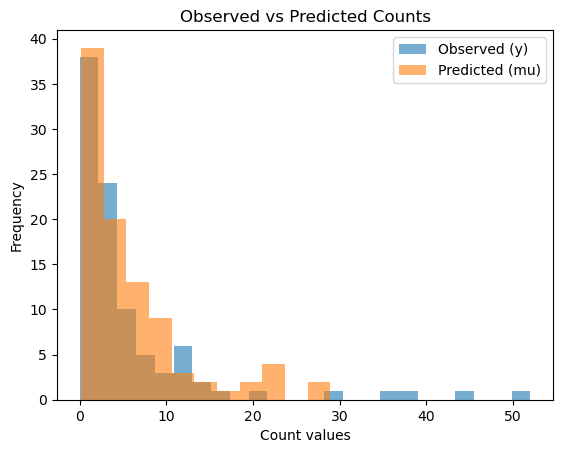

In [13]:
import matplotlib.pyplot as plt

# Histogram of observed values
plt.hist(y, bins='auto', alpha=0.6, label="Observed (y)")

# Histogram of predicted values (mu)
plt.hist(mu, bins='auto', alpha=0.6, label="Predicted (mu)")

plt.xlabel("Count values")
plt.ylabel("Frequency")
plt.title("Observed vs Predicted Counts")
plt.legend()
plt.show()

Visualialy it is possible perseinve that the observed data have much mora dispersion than the predicted poisson values. This reinforce the use of a negative bionomial distribuition. 

### 2.4 Estimation of the Dispersion Parameter (`alpha`) for NB2

The `alpha` parameter in the Negative Binomial (NB2) distribution is crucial for modeling overdispersion. It is estimated using the method of moments, which compares the observed variance with the expected variance under the Poisson model.

In [14]:

# === 3) método dos momentos para alpha (NB2): Var(Y) ≈ mu + alpha*mu^2 ===
num = ((y - mu)**2).sum() - mu.sum()
den = (mu**2).sum()
alpha_hat = max(num / den, 0.0)

print(f"alpha_hat (NB2, com period + offset) = {alpha_hat:.6f}")


alpha_hat (NB2, com period + offset) = 0.488932


A value of `alpha_hat` greater than zero confirms the presence of overdispersion and the suitability of the Negative Binomial model.

### 2.5 Negative Binomial Model Fitting and Comparison with Poisson

With the estimated `alpha_hat`, the GLM model with Negative Binomial distribution is fitted. Subsequently, a comparison with the Poisson model is performed using the likelihood ratio test (LR stat) to assess whether the inclusion of the dispersion parameter significantly improves the model fit.

In [15]:
from scipy import stats
import statsmodels.api as sm


# Ajustar modelo NB com alpha estimado
nb = sm.GLM(y, pois.model.exog, 
            family=sm.families.NegativeBinomial(alpha=alpha_hat), 
            offset=data['offset']).fit()

# Comparar log-likelihoods
ll_pois = pois.llf
ll_nb   = nb.llf

LR = 2 * (ll_nb - ll_pois)
p_value = stats.chi2.sf(LR, df=1)  # 1 parâmetro extra: alpha

print(f"LR stat: {LR:.4f}, p-valor: {p_value:.4f}")


LR stat: 158.8971, p-valor: 0.0000


A very low p-value (close to zero) indicates that the Negative Binomial model fits the data significantly better than the Poisson model, confirming the importance of considering overdispersion.

### 2.6 Variance and Mean Analysis (Review)

This code block reiterates the check of the relationship between variance and mean, reinforcing the need for the Negative Binomial model.

In [16]:
resid_var = np.var(y - mu, ddof=1)
print("Var(y):", np.var(y, ddof=1))
print("Mean(y):", np.mean(y))
print("Var/Mean (Poisson deveria ~1):", np.var(y, ddof=1) / np.mean(y))

Var(y): 84.40425531914893
Mean(y): 6.0
Var/Mean (Poisson deveria ~1): 14.067375886524822


### 2.7 AIC Comparison

Akaike Information Criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. Models with lower AIC are generally preferred. The comparison of AIC between Poisson and Negative Binomial models reinforces the choice of the most suitable model.

In [17]:
print("Poisson AIC:", pois.aic)
print("NB AIC:", nb.aic)

Poisson AIC: 625.2790553399149
NB AIC: 466.3820037026725


The significantly lower AIC for the Negative Binomial model confirms your relevance aplication over the Poisson model.

### 2.8 GLM NB Model Summary and Diagnostics

The summary aplying below of the GLM Negative Binomial model provides a comprehensive overview of the fitting results, including coefficients, standard errors, p-values, and other statistics. In addition, important diagnostics such as log-likelihood, AIC, BIC, and Pearson Chi2/df are calculated to assess the quality of the fit and the presence of remaining overdispersion.

In [18]:

# === 4) refitar GLM NB com alpha_hat e calcular diagnósticos ===
nb = smf.glm(
    formula=formula,
    data=data,
    family=sm.families.NegativeBinomial(alpha=alpha_hat),
    offset=data['offset']
).fit()

print(nb.summary())

# diagnósticos principais
loglik = nb.llf
aic    = nb.aic
bic    = nb.bic if hasattr(nb, "bic") else (2*nb.df_model - 2*loglik)  # fallback se versão não tiver .bic

# Pearson Chi2/df (checagem de dispersão remanescente)
pearson_chi2_df = (nb.resid_pearson**2).sum() / nb.df_resid

print("\n=== Diagnósticos do GLM NB (com alpha_hat) ===")
print(f"logLik : {loglik:.4f}")
print(f"AIC    : {aic:.4f}")
print(f"BIC    : {bic:.4f}")
print(f"Pearson Chi2/df: {pearson_chi2_df:.4f}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:            n_id_affect   No. Observations:                   95
Model:                            GLM   Df Residuals:                       92
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -230.19
Date:                Sat, 30 Aug 2025   Deviance:                       91.689
Time:                        19:49:01   Pearson chi2:                     73.1
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1002
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4401      0.139  

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


The model summary above and diagnostics provide detailed information about the significance of predictors and the overall model fit.

### 2.9 Effect Size Table (IRR)

For count models, coefficients are often interpreted as Incidence Rate Ratios (IRR). The IRR table and its 95% confidence intervals was calculated to facilitate the interpretation of the effects of predictor variables.

In [19]:
# ==== 3) Effect sizes table: IRR = exp(coef) with 95% CI ====
coef = nb.params
se   = nb.bse

irr = np.exp(coef)
lcl = np.exp(coef - 1.96*se)
ucl = np.exp(coef + 1.96*se)
pvl = nb.pvalues

irr_tbl = pd.DataFrame({
    "Term": coef.index,
    "IRR": irr.values,
    "CI95_low": lcl.values,
    "CI95_high": ucl.values,
    "p_value": pvl.values
})

In [20]:
# Map labels for readability
label_map = {
    "Intercept": "Intercept (MH)",
    "C(period)[T.EIP]": "EIP vs MH",
    "C(period)[T.LIP]": "LIP vs MH",
    
}
irr_tbl["Comparison"] = irr_tbl["Term"].map(label_map).fillna(irr_tbl["Term"])

cols = ["Comparison", "IRR", "CI95_low", "CI95_high", "p_value"]
irr_tbl = irr_tbl[cols]

# Print rounded summary
print("\n=== Effect sizes (IRR) and 95% CI ===")
print(irr_tbl.round({"IRR":3, "CI95_low":3, "CI95_high":3, "p_value":3}).to_string(index=False))


=== Effect sizes (IRR) and 95% CI ===
    Comparison   IRR  CI95_low  CI95_high  p_value
Intercept (MH) 0.237     0.180      0.311    0.000
     EIP vs MH 0.801     0.444      1.442    0.459
     LIP vs MH 1.688     1.150      2.477    0.007


This result show that the comparation between the reference period (C(period) = MH period) with the EIP don't show statistic difference, wich contradics the inicial expectation. However, the comparation with the LIP period show this diference, confirm the assumption of this study that the LIP period concentrate more incidence of trauma than the previous one. Only the second comparation is fitted with the hypoteses derived from the cultural multilevel seletion about the role of warfare and conflict in the evolution of complex society. 

## 3. Trauma Type Analysis comparation 

### 3.1 Selection and Aggregation of Trauma Variables

To compare trauma types (antemortem and perimortem) across periods, corresponding variables was selected and values aggregated (summed).


In [21]:
#selecting variables 

group_eip_anti = df.loc[df['period'] =='EIP', 'n_id_antimortem']
eip_anti = group_eip_anti.dropna() 
group_mh_anti = df.loc[df['period'] =='MH', 'n_id_antimortem']
mh_anti = group_mh_anti.dropna()
group_lip_anti = df.loc[df['period'] =='LIP', 'n_id_antimortem']
lip_anti = group_lip_anti.dropna()

group_eip_peri = df.loc[df['period'] =='EIP', 'n_id_perimortem']
eip_peri = group_eip_peri.dropna()
group_mh_peri = df.loc[df['period'] =='MH', 'n_id_perimortem']
mh_peri = group_mh_peri.dropna()
group_lip_peri = df.loc[df['period'] =='LIP', 'n_id_perimortem']
lip_peri = group_lip_peri.dropna()


These steps below prepare the data for visualization and comparison of total trauma by period and type:

In [22]:
sum_eip_anti = eip_anti.sum()
sum_mh_anti = mh_anti.sum()
sum_lip_anti = lip_anti.sum()

sum_eip_peri = eip_peri.sum()
sum_mh_peri = mh_peri.sum()
sum_lip_peri = lip_peri.sum()

### 3.2 Visualization: Sum of Antemortem Trauma by Period

A bar chart is used to visualize the sum of antemortem traumas in each period, facilitating the identification of trends or differences.

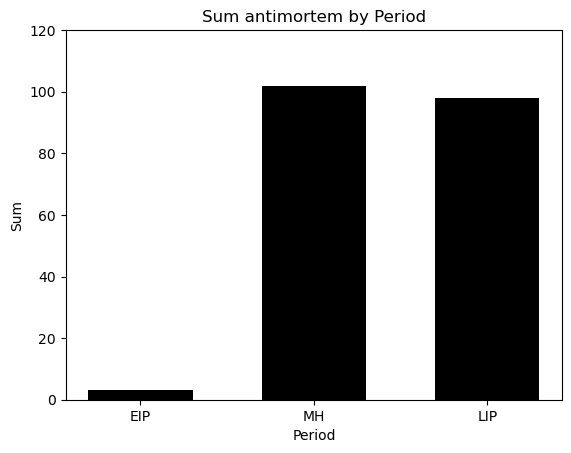

In [23]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
period = ['EIP', 'MH', 'LIP']
total = [sum_eip_anti, sum_mh_anti, sum_lip_anti]

fig, ax = plt.subplots()

# Plot bars in black with adjusted width of 0.6
ax.bar(period, total, color='black', width=0.6)

# Increase the maximum y-axis value to 120
ax.set_ylim(0, 120)

# Label and title configuration
ax.set_xlabel('Period')
ax.set_ylabel('Sum')
plt.title('Sum antimortem by Period')

# Display the bar chart
plt.show()

The gragh above show that the MH period and the LIP have very similar values of antimortem trauma. The EIP concentrate very fill, but this information about this period is missing, for this your role in the comparation don't have relevance. 

### 3.3 Visualization: Sum of Perimortem Trauma by Period

Similarly, a bar chart is generated for the sum of perimortem traumas by period, allowing for a visual comparison between trauma types.

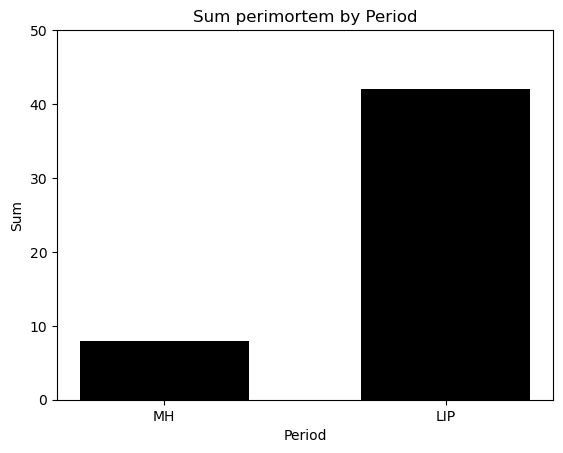

In [24]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
period = ['MH', 'LIP']
total = [sum_mh_peri, sum_lip_peri]

fig, ax = plt.subplots()

# Plot bars in black with adjusted width of 0.6
ax.bar(period, total, color='black', width=0.6)

# Increase the maximum y-axis value 50
ax.set_ylim(0, 50)

# Label and title configuration
ax.set_xlabel('Period')
ax.set_ylabel('Sum')
plt.title('Sum perimortem by Period')

# Display the bar chart
plt.show()

The comparation show that the LIP period have much more perimortem trauma than the MH, confirm the expectation that this period was significantily more conflituos than the previous one